<a href="https://colab.research.google.com/github/ssuzana/Machine-Learning-Notebooks/blob/main/Predict_House_Prices_with_Multivariable_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will use the dataset known as the "*California housing dataset*". 

See other data sets at [https://scikit-learn.org/stable/datasets/real_world.html](https://scikit-learn.org/stable/datasets/real_world.html).

In [1]:
# notebook imports

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline

## Load and explore the data

In [2]:
# fetch the dataset

california_housing = fetch_california_housing(as_frame=True)

In [3]:
dir(california_housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
# dataset description
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
#california_housing.frame.head()
california_housing.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
california_housing.data.shape

(20640, 8)

In [7]:
california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

In [8]:
california_housing.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [9]:
# Create a pandas dataframe
data = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)

# Add column with the price (target)
data['PRICE'] = california_housing.target 

In [10]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
# check for missing values
pd.isnull(data).any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
PRICE         False
dtype: bool

## Visualizing Data

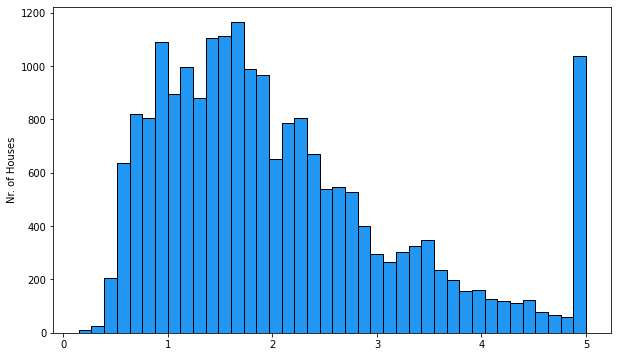

In [12]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'],bins=40,ec='black', color='#2196F3')
plt.ylabel('Nr. of Houses')
plt.show()

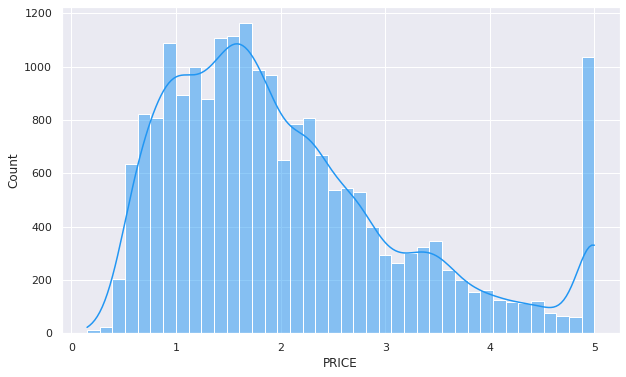

In [13]:
# histogram using seaborn
plt.figure(figsize=(10,6))
sns.set()
sns.histplot(data['PRICE'],bins=40, color='#2196F3', kde=True)
plt.show()

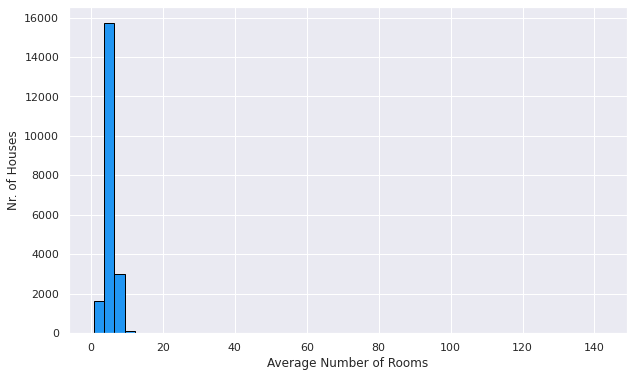

In [14]:
# Ave. number of rooms per household

plt.figure(figsize=(10,6))
plt.hist(data['AveRooms'], ec='black', color='#2196F3',bins=50)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Houses')
plt.show()

In [15]:
data['AveRooms'].mean()

5.428999742190376

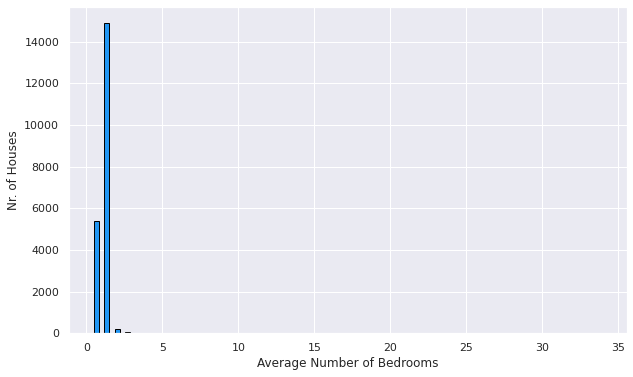

In [16]:
# Average number of bedrooms per household

plt.figure(figsize=(10,6))
plt.hist(data['AveBedrms'], ec='black', color='#2196F3',bins=50, rwidth=0.5)
plt.xlabel('Average Number of Bedrooms')
plt.ylabel('Nr. of Houses')
plt.show()

In [17]:
max(data['AveRooms'])


141.9090909090909

Descriptive Statistics

In [18]:
100000*data['PRICE'].min()

14999.000000000002

In [19]:
100000*data['PRICE'].max()

500000.99999999994

In [20]:
data.min()

MedInc          0.499900
HouseAge        1.000000
AveRooms        0.846154
AveBedrms       0.333333
Population      3.000000
AveOccup        0.692308
Latitude       32.540000
Longitude    -124.350000
PRICE           0.149990
dtype: float64

In [21]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Correlation:

$$ -1 \leq \rho_{XY} = corr(X,Y) \leq 1$$

In [22]:
data['PRICE'].corr(data['AveRooms'])

0.15194828974145774

In [23]:
data['PRICE'].corr(data['HouseAge'])

0.10562341249320989

In [24]:
data['PRICE'].corr(data['MedInc'])

0.6880752079585475

In [25]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
PRICE,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


We can see that the median income is helpful to distinguish high-valued from low-valued houses.

We also note there is a high correlation of 0.847621 between the features AveRooms and AveBedrms.

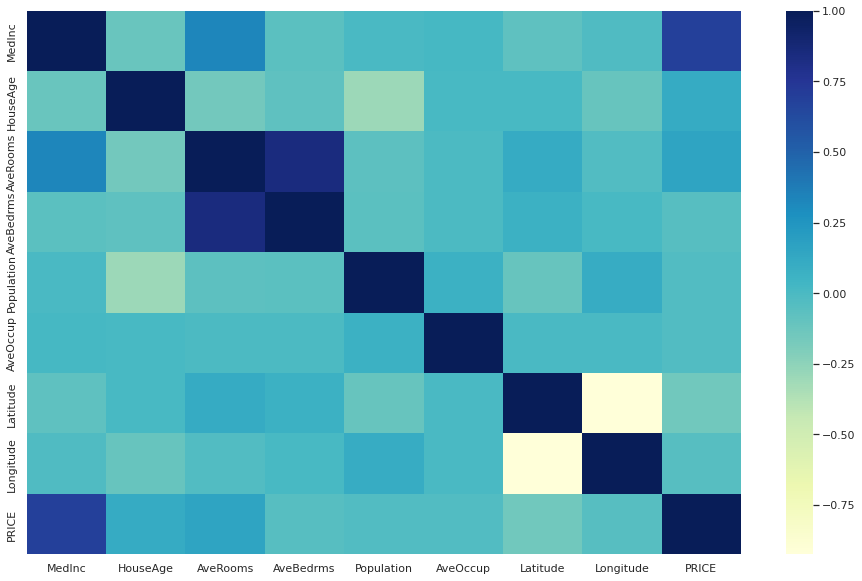

In [26]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), cmap="YlGnBu")
plt.show()

Use a mask to plot only part of the correlation matrix:


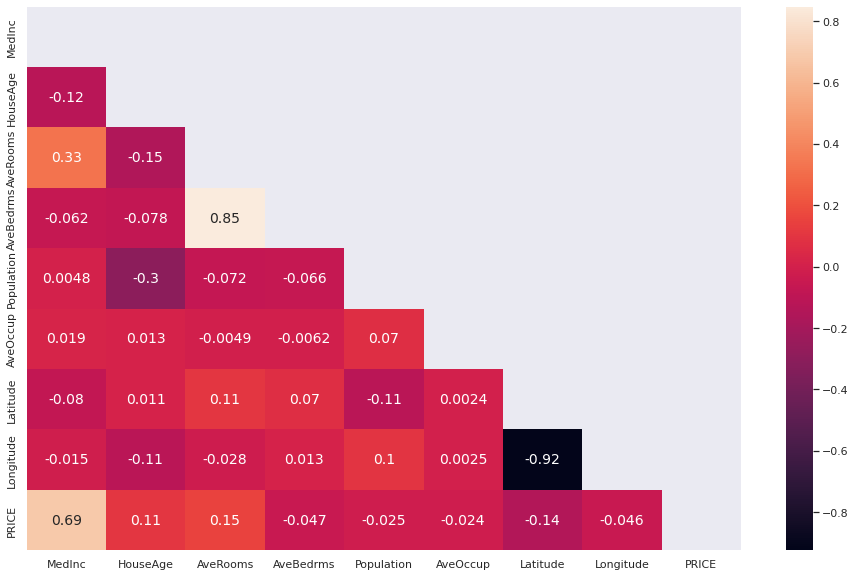

In [27]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws = {'size': 14})
sns.axes_style("white")
plt.show()

The correlation values are only useful for exploring continuous features. Also, correlation does not imply causation!

See [Anscombes Quartet.](https://towardsdatascience.com/importance-of-data-visualization-anscombes-quartet-way-a325148b9fd2)

* Continuous features in the dataset have a different range of values. Common examples of continuous features are age, salary, prices, and heights.
* Categorical features represent types of data that may be divided into groups. For example, genders and educational levels.

Any non-numerical values need to be converted to integers or floats to be utilized in most machine learning libraries.



We now make a scatter plot where the x- and y-axis would be the latitude and longitude and the circle size and color would be linked with the house value in the district.

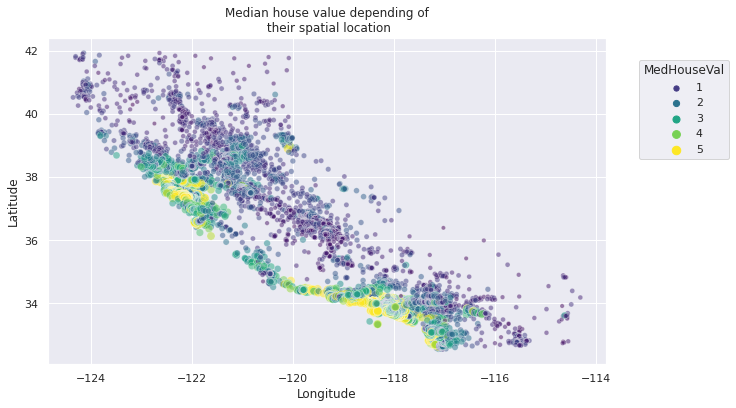

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=california_housing.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

We note that the high-valued houses will be located on the coast, where the big cities from California are located: San Diego, Los Angeles, San Jose, or San Francisco.

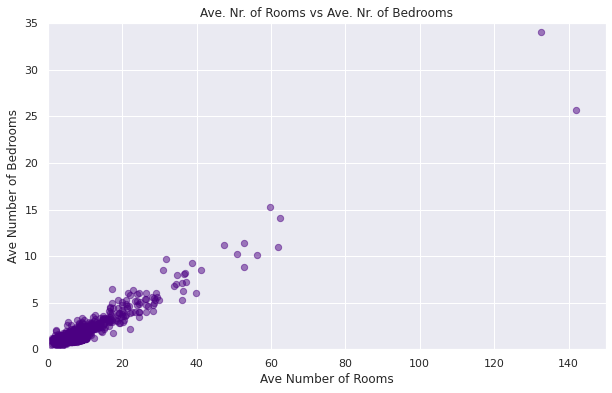

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(data['AveRooms'],data['AveBedrms'],alpha=0.5, s=40, color='indigo')
plt.title('Ave. Nr. of Rooms vs Ave. Nr. of Bedrooms')
plt.xlabel('Ave Number of Rooms')
plt.ylabel('Ave Number of Bedrooms')
plt.xlim(0, 150)
plt.ylim(0, 35)
plt.show()

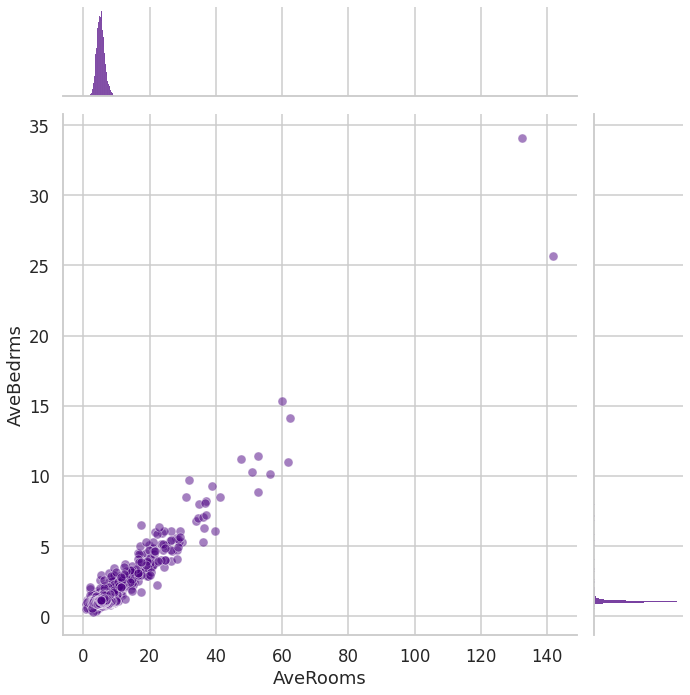

In [30]:
# reset seaborn styling to default
# sns.set()

sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['AveRooms'], y=data['AveBedrms'], color='indigo', height=10, kind='scatter', alpha=0.5)
plt.show()

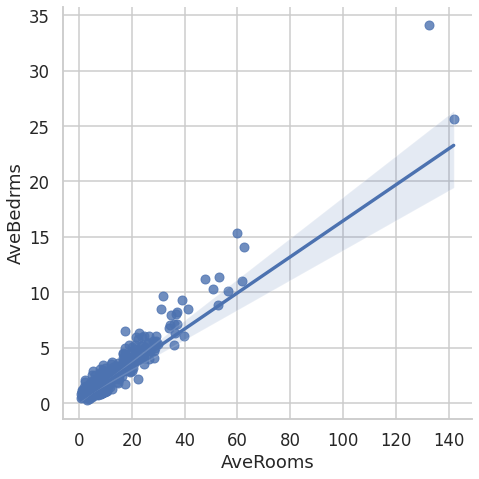

In [31]:
sns.lmplot(x='AveRooms', y='AveBedrms',data=data, height=7)
plt.show()

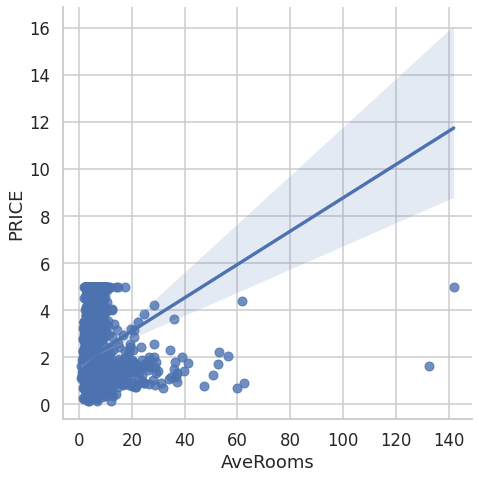

In [32]:
sns.lmplot(x='AveRooms', y='PRICE',data=data, height=7)
plt.show()

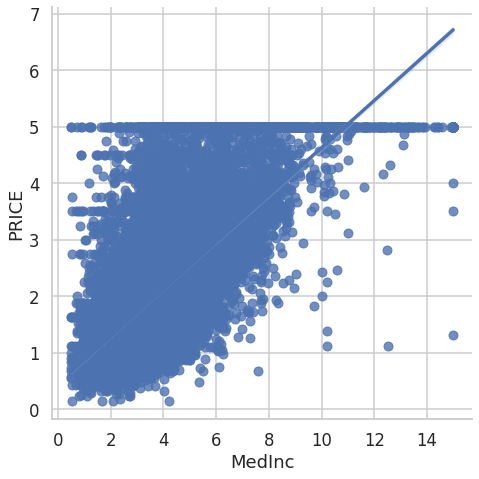

In [33]:
sns.lmplot(x='MedInc', y='PRICE',data=data, height=7)
plt.show()

In [34]:
#sns.pairplot(data)
#plt.show()

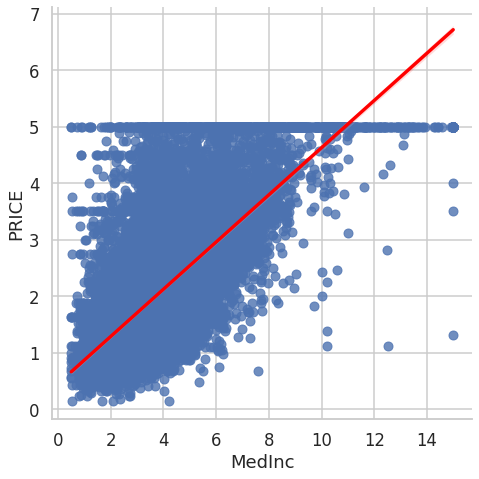

In [35]:
sns.lmplot(x='MedInc', y='PRICE',data=data, height=7, line_kws = {'color': 'red'})
plt.show()

# Training and Test Dataset Split

In [36]:
prices = data['PRICE']
features = data.drop('PRICE', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# percentage of training set
print(len(X_train)/ len(features))

# percentage of test data set
print(X_test.shape[0]/features.shape[0])

0.8
0.2


# Multivariable Regression

In [37]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print('Intercept:', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Intercept: -37.48696576537286


,coef
MedInc,0.433102
HouseAge,0.009324
AveRooms,-0.100333
AveBedrms,0.615219
Population,-0.000003
AveOccup,-0.004782
Latitude,-0.429077
Longitude,-0.441484


In [38]:
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

Training data r-squared: 0.6074049305021048
Test data r-squared: 0.6009790143129111


# Data Transformations

In [39]:
data['PRICE'].skew()

0.9777632739098345

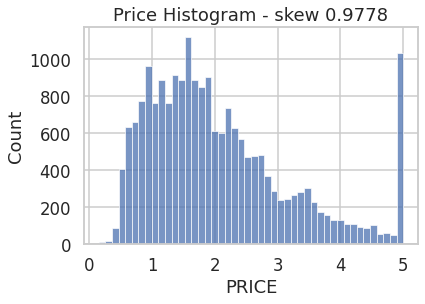

In [40]:
sns.histplot(data['PRICE'])
plt.title(f"Price Histogram - skew {round(data['PRICE'].skew(),4)}")
plt.show()

In [41]:
y_log = np.log(data['PRICE'])
y_log.tail()

20635   -0.247180
20636   -0.260067
20637   -0.080126
20638   -0.166055
20639   -0.112050
Name: PRICE, dtype: float64

In [42]:
y_log.skew()

-0.17317539032496646

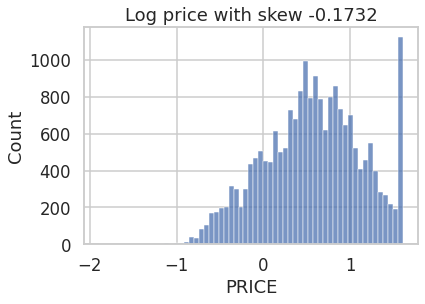

In [43]:
sns.histplot(y_log)
plt.title(f"Log price with skew {round(y_log.skew(),4)}")
plt.show()

# Regression using log prices

In [44]:
prices = np.log(data['PRICE'])
data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)


print('Intercept:', regr.intercept_)
print(pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']))

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

Intercept: -24.570490460846457
                coef
MedInc      0.186068
HouseAge    0.002279
AveRooms   -0.030865
AveBedrms   0.224873
Population  0.000008
AveOccup   -0.002259
Latitude   -0.289071
Longitude  -0.289146
Training data r-squared: 0.6168233836099826
Test data r-squared: 0.6037489256704884


$p$ values and Evaluating Coefficients

In [45]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#results.params
orig_coef = pd.DataFrame({'coef': round(results.params,4), 'p-values': round(results.pvalues,4)})
print(f"R-squared:", results.rsquared)
print(f"Bayesian Information Criterion:", results.bic)

R-squared: 0.6168233836099826
Bayesian Information Criterion: 12467.657146183048


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [46]:
# Reduced model excluding some of the features

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['Population', 'AveRooms'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#results.params
reduced_coef = pd.DataFrame({'coef': round(results.params,4), 'p-values': round(results.pvalues,4)})
print(f"R-squared:", results.rsquared)
print(f"Bayesian Information Criterion:", results.bic)

R-squared: 0.6142906409024322
Bayesian Information Criterion: 12557.016297788763


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [47]:
frames = [orig_coef, reduced_coef]
pd.concat(frames, axis=1)

,coef,p-values,coef,p-values
const,-24.5705,0.0000,-25.4441,0.0
MedInc,0.1861,0.0000,0.1690,0.0
HouseAge,0.0023,0.0000,0.0021,0.0
AveRooms,-0.0309,0.0000,NaN,NaN
AveBedrms,0.2249,0.0000,0.0868,0.0
Population,0.0000,0.0014,NaN,NaN
AveOccup,-0.0023,0.0000,-0.0022,0.0
Latitude,-0.2891,0.0000,-0.3028,0.0
Longitude,-0.2891,0.0000,-0.3011,0.0


In [48]:
# Residuals
#residuals = y_train - results.fittedvalues
#residuals.describe()
results.resid.describe()

count    1.651200e+04
mean    -2.423436e-14
std      3.531976e-01
min     -2.487653e+00
25%     -2.146296e-01
50%     -9.524206e-03
75%      2.071992e-01
max      1.530821e+00
dtype: float64

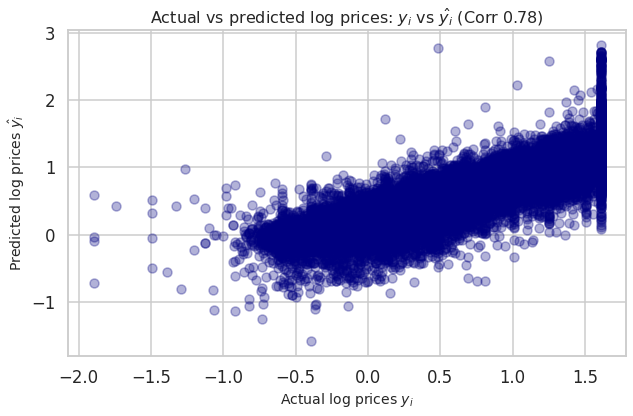

In [49]:
corr = round(y_train.corr(results.fittedvalues),2)
plt.figure(figsize=(10,6))
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.3)
plt.xlabel('Actual log prices $y_i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat{y_i}$', fontsize=14)
plt.title("Actual vs predicted log prices: $y_i$ vs $\hat{y_i}$" + f" (Corr {corr})", fontsize=16)
plt.show()

In [50]:
print(results.resid.mean())
print(results.resid.skew())


-2.4234355908772117e-14
0.01691749381006211


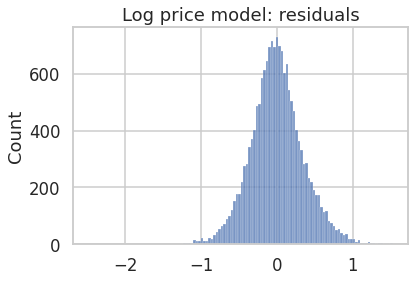

In [51]:
sns.histplot(results.resid)
plt.title('Log price model: residuals')
plt.show()